***Notice: In all code in this jupyter, all y_labels are not np.array. Do y_labels = np.asarray(y_labels) if need***

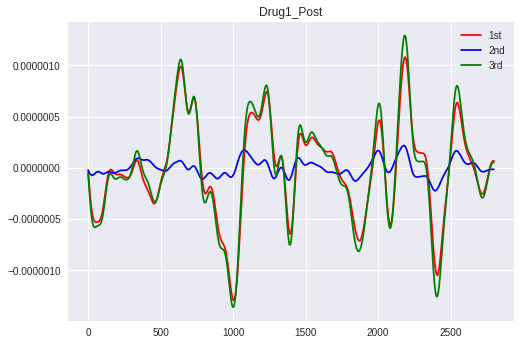

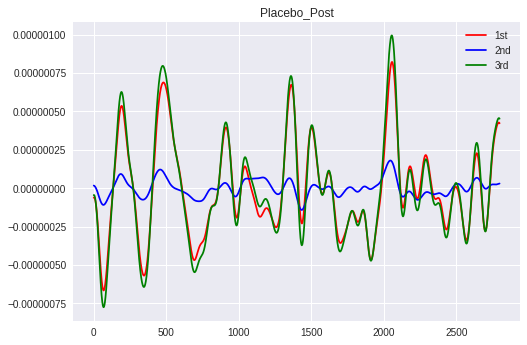

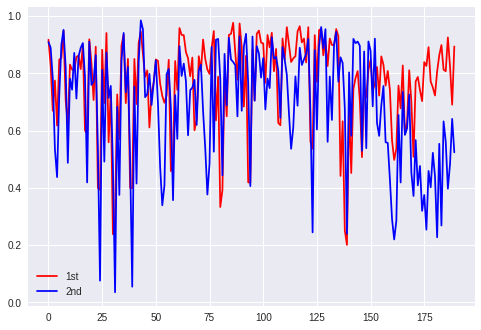

In [65]:
# -*- coding: utf-8 -*-

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier
#import h5py 

#f = h5py.File(dataFile1,'r') 
#data = f.get('data/variable1') 
#data = np.array(data) # For converting to numpy array
# ==== ==== ==== ==== Load and cut 2800 ==== ==== ==== ==== 
dataDrug1 = sio.loadmat('drug1.mat')            # 28 
dataPlacebo = sio.loadmat('placebo.mat')    #33
dataDrug1_2 = sio.loadmat('drug1_2.mat')    #48

listDrug1ReadDict = dataDrug1['drug1']
listPlaceboReadDict = dataPlacebo['placebo']
listDrug1_2ReadDict = dataDrug1_2['drug1_2']

listDrug1ReadDict = listDrug1ReadDict.transpose()
listPlaceboReadDict = listPlaceboReadDict.transpose()
listDrug1_2ReadDict = listDrug1_2ReadDict.transpose()

listDrug1 = []
listPlacebo = []
listDrug1_2 = []


for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,]     # Abandon all points after 2800 for consistent data
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,] # Same as above
    
    
for i in range(48):
    listDrug1_2.append(listDrug1_2ReadDict[i][0][0])
for i in range(48):
    listDrug1_2[i] = listDrug1_2[i][:2800, : ,] # Same as above
# ==== ==== ==== ==== Plot ==== ==== ==== ==== 
x = []
for i in range(2800):
    x.append(i)
# Drug
dg = listDrug1[0][:,:, 0]
a1 = dg[:, 0]
a2 = dg[:, 1]
a3 = dg[:, 2]
plt.plot(x, a1, color = 'red', label = '1st')
plt.plot(x, a2,color = 'blue', label = '2nd')
plt.plot(x, a3, color = 'green', label = '3rd')
plt.title('Drug1_Post')
plt.legend()
plt.show()
# Placebo
pl = listPlacebo[0][:,:, 0]
b1 = pl[:, 0]
b2 = pl[:, 1]
b3 = pl[:, 2]
plt.plot(x, b1, color = 'red', label = '1st')
plt.plot(x, b2,color = 'blue', label = '2nd')
plt.plot(x, b3, color = 'green', label = '3rd')
plt.title('Placebo_Post')
plt.legend()
plt.show()
# ==== ==== ==== ==== Focus on 1st and 2nd for drug and placebo ==== ==== ==== ==== 
listDrug1_1st = []
for i in range(28):
    listDrug1_1st.append(listDrug1[i][:, 0,])
    
listDrug1_2nd = []
for i in range(28):
    listDrug1_2nd.append(listDrug1[i][:, 0,])
    
listPlacebo_1st = []
for i in range(33):
    listPlacebo_1st.append(listPlacebo[i][:, 0,])
    
listPlacebo_2nd  = []
for i in range(33):
    listPlacebo_2nd.append(listPlacebo[i][:, 0,])


listDrug1_2_1st = []
for i in range(48):
    listDrug1_2_1st.append(listDrug1_2[i][:, 0,])
    
listDrug1_2_2nd = []
for i in range(48):
    listDrug1_2_2nd.append(listDrug1_2[i][:, 0,])
    
# ==== ==== ==== ==== P coeff & vetorized ==== ==== ==== ==== 

# Return Pearson product-moment correlation coefficients.
# listDrug1_1st_ P Correalation
listDrug1_1st_Corr = []
Drug1_1st_Corr_Vetorized = []
for ID in range(28):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_1st[ID][:,i],  listDrug1_1st[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_1st_Corr.append(tempCorrMatrix)
    
# listDrug1_2nd_P Correalation
listDrug1_2nd_Corr = []
Drug1_2nd_Corr_Vetorized = []
for ID in range(28):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_2nd[ID][:,i],  listDrug1_2nd[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_2nd_Corr_Vetorized.append(tempVetorized)
    listDrug1_2nd_Corr.append(tempCorrMatrix)
    
    
# listPlacebo_1st_P Correalation
listPlacebo_1st_Corr = []
Placebo_1st_Corr_Vetorized = []
for ID in range(33):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_1st[ID][:,i],  listPlacebo_1st[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_1st_Corr.append(tempCorrMatrix)


# listPlacebo_2nd_P Correalation
listPlacebo_2nd_Corr = []
Placebo_2nd_Corr_Vetorized = []
for ID in range(33):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_2nd[ID][:,i],  listPlacebo_2nd[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_2nd_Corr_Vetorized.append(tempVetorized)
    listPlacebo_2nd_Corr.append(tempCorrMatrix)

# listDrug1_2_1st_ P Correalation
listDrug1_2_1st_Corr = []
Drug1_2_1st_Corr_Vetorized = []
for ID in range(48):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_2_1st[ID][:,i],  listDrug1_2_1st[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_2_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_2_1st_Corr.append(tempCorrMatrix)
    
# listDrug1_2_2nd_P Correalation
listDrug1_2_2nd_Corr = []
Drug1_2_2nd_Corr_Vetorized = []
for ID in range(48):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_2_2nd[ID][:,i],  listDrug1_2_2nd[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_2_2nd_Corr_Vetorized.append(tempVetorized)
    listDrug1_2_2nd_Corr.append(tempCorrMatrix)
    
# ==== ==== ==== ==== Plot ==== ==== ==== ==== 
x = []
for kk in range(190):
    x.append(kk)
plt.plot(x, Drug1_1st_Corr_Vetorized[0], color = 'red', label = '1st')
plt.plot(x, Placebo_1st_Corr_Vetorized[0],color = 'blue', label = '2nd')
plt.legend()
plt.show()



In [0]:
permutation = np.random.permutation(61)

y_d1_pl = np.asarray(y_d1_pl)
X_d1_pl = X_d1_pl[permutation, :]
y_d1_pl = y_d1_pl[permutation]

In [68]:
# ==== ==== ==== ==== Training by Drug1 and Placebo 1st ==== ==== ==== ==== 

# ==== ==== ==== ==== SVM ==== ==== ==== ==== 
X_d1_pl = Drug1_1st_Corr_Vetorized + Placebo_1st_Corr_Vetorized
X_d1_pl = np.arctanh(X_d1_pl)
y_d1_pl = []
for label in range(61):
    if label < 28:
        y_d1_pl.append(1)
    else:
        y_d1_pl.append(0)

#clf_d1_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=0.9)
clf_d1_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) # Good
#clf_d1_pl = svm.SVC()

# Train
clf_d1_pl.fit(X_d1_pl, y_d1_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_pl = cross_validate(clf_d1_pl, X_d1_pl, y_d1_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_pl.keys())         
print("Training by Drug1 and Placebo 1st_SVM:")
print(cv_results_d1_pl['test_score'])


# ==== ==== ==== ==== RF ==== ==== ==== ==== 
clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                
print("Training by Drug1 and Placebo 1st_RF:")
print(cv_results_d1_Aug_pl['test_score'])
      
      
      
# ==== ==== ==== ==== Training by Drug1_2 and Placebo 1st ==== ==== ==== ==== 

# ==== ==== ==== ==== SVM ==== ==== ==== ==== 
      
X_d1_2_pl = Drug1_2_1st_Corr_Vetorized + Placebo_1st_Corr_Vetorized
X_d1_2_pl = np.arctanh(X_d1_2_pl)
y_d1_2_pl = []
for label in range(81):
    if label < 48:
        y_d1_2_pl.append(1)
    else:
        y_d1_2_pl.append(0)


#clf_d1_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=0.9)
clf_d1_2_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) # Good
#clf_d1_pl = svm.SVC()

# Train
clf_d1_2_pl.fit(X_d1_2_pl, y_d1_2_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_2_pl = cross_validate(clf_d1_pl, X_d1_2_pl, y_d1_2_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_2_pl.keys())       
print("Training by Drug1_2 and Placebo 1st_SVM:")
print(cv_results_d1_2_pl['test_score'])

      
# ==== ==== ==== ==== RF ==== ==== ==== ==== 

clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())           
print("Training by Drug1_2 and Placebo 1st_RF:")
print(cv_results_d1_Aug_pl['test_score'])

Training by Drug1 and Placebo 1st_SVM:
[0.46153846 0.76923077 0.38461538 0.63636364 0.54545455]
Training by Drug1 and Placebo 1st_RF:
[0.58852459 0.62459016 0.66065574 0.63934426 0.51639344]
Training by Drug1_2 and Placebo 1st_SVM:
[0.41176471 0.52941176 0.64705882 0.6        0.73333333]
Training by Drug1_2 and Placebo 1st_RF:
[0.58852459 0.62459016 0.66065574 0.63934426 0.51639344]


## 50 * 500

In [0]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 50 * 500
#''' ↓ Following is the same as prev lines, just for reload the data.
listDrug1 = []
listDrug1_Aug = [] # 1400
listPlacebo = []
listPlacebo_Aug = [] # 1650

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(50): # Split into 50 * 500 time samples 
        randNum = np.random.randint(0,2300)
        listDrug1_Aug.append(listDrug1[i][randNum:randNum + 500, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(50):
        randNum = np.random.randint(0,2300)
        listPlacebo_Aug.append(listPlacebo[i][randNum:randNum + 500, : ,])

# just use 1st channel
for i in range(1400):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(1650):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]       
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(1400):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(1650):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(3050):
    if label < 1400:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        

In [0]:
permutation = np.random.permutation(3050)

y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [71]:
# ======= SVM 1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.92622951 0.92622951 0.93442623 0.91639344 0.91639344]


In [72]:
# ==== ==== ==== ==== Training by Drug 1st AUGMENTATION and Placebo 1st ==== ==== ==== ==== 
# ======= SVM 2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())          
print("Training by Drug 1st Aug and Placebo 1st Aug_SVM:")
print(cv_results_d1_Aug_pl['test_score'])

Training by Drug 1st Aug and Placebo 1st Aug_SVM:
[0.92786885 0.92786885 0.93606557 0.91639344 0.9295082 ]


In [73]:
# ======= SVM 3 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.96229508 0.93934426 0.96065574 0.95901639 0.93442623]


In [74]:
# ======= RF =======
clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.96229508 0.95245902 0.96557377 0.96557377 0.94098361]


## 50 * 600

In [75]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 50 * 600
#''' ↓ Following is the same as prev lines, just for reload the data.
listDrug1 = []
listDrug1_Aug = [] # 1400
listPlacebo = []
listPlacebo_Aug = [] # 1650

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(50): # Split into 50 * 600 time samples 
        randNum = np.random.randint(0,2200)
        listDrug1_Aug.append(listDrug1[i][randNum:randNum + 600, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(50):
        randNum = np.random.randint(0,2200)
        listPlacebo_Aug.append(listPlacebo[i][randNum:randNum + 600, : ,])

# just use 1st channel
for i in range(1400):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(1650):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]

print("Checkpoint1")         
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(1400):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

print("Checkpoint2.1") 
# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(1650):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(3050):
    if label < 1400:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        
print("Checkpoint2.2")  

Checkpoint1
Checkpoint2.1
Checkpoint2.2


In [0]:
permutation = np.random.permutation(3050)

y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [77]:
# ======= SVM 1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) 
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.96393443 0.97540984 0.96065574 0.97377049 0.96885246]


In [78]:
# ======= SVM 2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) 
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.95409836 0.97540984 0.95245902 0.97213115 0.97213115]


In [79]:
# ======= SVM 3 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) 
clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.97213115 0.96885246 0.95737705 0.95901639 0.95737705]


In [80]:
# ======= SVM 4 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5) 
#clf_d1_Aug_pl = svm.SVC()
clf_d1_Aug_pl = svm.NuSVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.96885246 0.96393443 0.95409836 0.9557377  0.94918033]


In [81]:
# ======= RF =======
clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.97540984 0.97213115 0.96393443 0.97213115 0.97540984]


## 100 X 300 -> Drug |  100 X 600 -> Placebo（Mark)

In [82]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 100 * 300
#''' ↓ Following is the same as prev lines, just for reload the data.


listDrug1 = []
listDrug1_Aug = [] # 2800
listPlacebo = []
listPlacebo_Aug = [] # 3300

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(100): # Split into 100 * 300 time samples 
        randNum = np.random.randint(0,2500)
        listDrug1_Aug.append(listDrug1[i][randNum : randNum + 300, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(100):
        randNum = np.random.randint(0,2200)
        listPlacebo_Aug.append(listPlacebo[i][randNum : randNum + 600, : ,])

# just use 1st channel
for i in range(2800):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(3300):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]

print("Checkpoint1")         
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(2800):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

print("Checkpoint2.1") 
# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(3300):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(6100):
    if label < 2800:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        
print("Checkpoint2.2")  

Checkpoint1
Checkpoint2.1
Checkpoint2.2


In [0]:
permutation = np.random.permutation(6100)
y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [84]:
# ======= SVM1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.87540984 0.8557377  0.86639344 0.86557377 0.86885246]


In [85]:
# ======= SVM2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.88114754 0.85901639 0.8647541  0.86147541 0.86557377]


In [86]:
# ======= SVM3 =======
# 100 * 300  GOOD

#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.9795082  0.97868852 0.98852459 0.98442623 0.97704918]


In [87]:
# ======= SVM4 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()
clf_d1_Aug_pl = clf_d1_Aug_pl = svm.NuSVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.92459016 0.92622951 0.93852459 0.93770492 0.91803279]


In [88]:
# ======= RF =======
# 100 * 300  GOOD

clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.98688525 0.98442623 0.98852459 0.98852459 0.98114754]


## 100 * 250

In [89]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 100 * 250
#''' ↓ Following is the same as prev lines, just for reload the data.


listDrug1 = []
listDrug1_Aug = [] # 2800
listPlacebo = []
listPlacebo_Aug = [] # 3300

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(100): # Split into 100 * 250 time samples 
        randNum = np.random.randint(0,2550)
        listDrug1_Aug.append(listDrug1[i][randNum:randNum + 250, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(100):
        randNum = np.random.randint(0,2550)
        listPlacebo_Aug.append(listPlacebo[i][randNum:randNum + 250, : ,])

# just use 1st channel
for i in range(2800):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(3300):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]

print("Checkpoint1")         
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(2800):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

print("Checkpoint2.1") 
# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(3300):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(6100):
    if label < 2800:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        
print("Checkpoint2.2")  

Checkpoint1
Checkpoint2.1
Checkpoint2.2


In [0]:
permutation = np.random.permutation(6100)
y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [91]:
# ======= SVM1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.7852459  0.80491803 0.75819672 0.77131148 0.79180328]


In [92]:
# ======= SVM2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.78360656 0.80163934 0.77786885 0.79016393 0.79180328]


# MMM

In [93]:
# ======= SVM3 =======
# 100 * 300  GOOD

#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
clf_d1_Aug_pl = svm.SVC()

# Train
#clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])



[0.92786885 0.92295082 0.92786885 0.93688525 0.93852459]


In [94]:
clf_d1_Aug_pl.fit(X_d1_Aug_pl[:5000], y_d1_Aug_pl[:5000])
l = clf_d1_Aug_pl.predict(X_d1_Aug_pl[5000:])
total = 0
true = 0
for m in l:
    if m == y_d1_Aug_pl[total + 5000]:
        true += 1
    total += 1
print(true / total)

0.9427272727272727


In [95]:
# ======= SVM4 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()
clf_d1_Aug_pl = svm.NuSVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.92704918 0.91639344 0.92704918 0.93196721 0.93852459]


In [96]:
# ======= RF =======
# 100 * 300  GOOD

clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.91885246 0.91393443 0.91065574 0.89672131 0.91803279]


## 100 X 300

In [97]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 100 * 300
#''' ↓ Following is the same as prev lines, just for reload the data.


listDrug1 = []
listDrug1_Aug = [] # 2800
listPlacebo = []
listPlacebo_Aug = [] # 3300

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(100): # Split into 100 * 300 time samples 
        randNum = np.random.randint(0,2500)
        listDrug1_Aug.append(listDrug1[i][randNum:randNum + 300, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(100):
        randNum = np.random.randint(0,2500)
        listPlacebo_Aug.append(listPlacebo[i][randNum:randNum + 300, : ,])

# just use 1st channel
for i in range(2800):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(3300):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]

print("Checkpoint1")         
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(2800):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

print("Checkpoint2.1") 
# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(3300):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(6100):
    if label < 2800:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        
print("Checkpoint2.2")  

Checkpoint1
Checkpoint2.1
Checkpoint2.2


In [0]:
permutation = np.random.permutation(6100)
y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [99]:
# ======= SVM1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.81721311 0.79836066 0.80163934 0.80819672 0.81557377]


In [100]:
# ======= SVM2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.81885246 0.8057377  0.8295082  0.81639344 0.81311475]


In [101]:
# ======= SVM3 =======
# 100 * 300  GOOD

#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.96065574 0.95       0.95       0.95983607 0.95737705]


In [102]:
# ======= SVM4 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()
clf_d1_Aug_pl = clf_d1_Aug_pl = svm.NuSVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.95327869 0.94098361 0.93688525 0.95491803 0.95409836]


In [103]:
# ======= RF =======
# 100 * 300  GOOD

clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.92868852 0.93770492 0.93606557 0.94590164 0.93770492]


## 50 X 200

In [105]:
# ==== ==== ==== ==== Drug1st AUGMENTATION and Placebo 1st AUGMENTATION==== ==== ==== ==== 100 * 300
#''' ↓ Following is the same as prev lines, just for reload the data.


listDrug1 = []
listDrug1_Aug = [] # 1400
listPlacebo = []
listPlacebo_Aug = [] # 1650

for i in range(28):
    listDrug1.append(listDrug1ReadDict[i][0][0])
for i in range(28):
    listDrug1[i] = listDrug1[i][:2800, : ,] 
for i in range(28):
    for j in range(50): # Split into 100 * 250 time samples 
        randNum = np.random.randint(0,2600)
        listDrug1_Aug.append(listDrug1[i][randNum:randNum + 200, : ,])
    
for i in range(33):
    listPlacebo.append(listPlaceboReadDict[i][0][0])
for i in range(33):
    listPlacebo[i] = listPlacebo[i][:2800, : ,]
for i in range(33):
    for j in range(50):
        randNum = np.random.randint(0,2600)
        listPlacebo_Aug.append(listPlacebo[i][randNum:randNum + 200, : ,])

# just use 1st channel
for i in range(1400):
    listDrug1_Aug[i] = listDrug1_Aug[i][:,0,]
for i in range(1650):
    listPlacebo_Aug[i] = listPlacebo_Aug[i][:,0,]

print("Checkpoint1")         
 #''' ↑ Following is the same as prev lines, just for reload the data.
 
 
listDrug1_Aug_1st_Corr = []
Drug1_Aug_1st_Corr_Vetorized = []
for ID in range(1400):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listDrug1_Aug[ID][:,i],  listDrug1_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Drug1_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listDrug1_Aug_1st_Corr.append(tempCorrMatrix)

print("Checkpoint2.1") 
# listPlacebo_1st_P Correalation
listPlacebo_Aug_1st_Corr = []
Placebo_Aug_1st_Corr_Vetorized = []
for ID in range(1650):
    tempCorrMatrix = np.identity(20)
    tempVetorized = []
    for i in range(20):
        count = 0
        for j in range(20):
            if i == j :
                continue
            temp = np.corrcoef(listPlacebo_Aug[ID][:,i],  listPlacebo_Aug[ID][:,j])
            tempCorrMatrix[i][j] = temp[0][1]
            if count < i:
                tempVetorized.append(temp[0][1])
                count += 1
    Placebo_Aug_1st_Corr_Vetorized.append(tempVetorized)
    listPlacebo_Aug_1st_Corr.append(tempCorrMatrix)

X_d1_Aug_pl = Drug1_Aug_1st_Corr_Vetorized + Placebo_Aug_1st_Corr_Vetorized
X_d1_Aug_pl = np.arctanh(X_d1_Aug_pl)
y_d1_Aug_pl = []
for label in range(3050):
    if label < 1400:
        y_d1_Aug_pl.append(1)
    else:
        y_d1_Aug_pl.append(0)
        
print("Checkpoint2.2")  

Checkpoint1
Checkpoint2.1
Checkpoint2.2


In [0]:
permutation = np.random.permutation(3050)
y_d1_Aug_pl = np.asarray(y_d1_Aug_pl)
X_d1_Aug_pl = X_d1_Aug_pl[permutation, :]
y_d1_Aug_pl = y_d1_Aug_pl[permutation]

In [108]:
# ======= SVM1 =======
clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.76229508 0.7147541  0.72295082 0.7295082  0.70163934]


In [109]:
# ======= SVM2 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.76393443 0.72786885 0.74590164 0.74918033 0.75245902]


In [110]:
# ======= SVM3 =======
# 100 * 300  GOOD

#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
clf_d1_Aug_pl = svm.SVC()

# Train
#clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])



[0.86721311 0.86393443 0.83278689 0.86229508 0.87540984]


In [111]:
# ======= SVM4 =======
#clf_d1_Aug_pl = svm.LinearSVC(random_state=0, tol=1e-5, C=1)
#clf_d1_Aug_pl = svm.LinearSVC(penalty='l1', C=1.0, dual=False, tol=1e-5)
#clf_d1_Aug_pl = svm.SVC()
clf_d1_Aug_pl = svm.NuSVC()

# Train
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)
#print(clf_d1_pl.predict(X))

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.91147541 0.89836066 0.86885246 0.88688525 0.89672131]


In [112]:
# ======= RF =======
# 100 * 300  GOOD

clf_d1_Aug_pl = RandomForestClassifier(n_jobs=1, random_state=0)
clf_d1_Aug_pl.fit(X_d1_Aug_pl, y_d1_Aug_pl)

# Cross Validation
cv_results_d1_Aug_pl = cross_validate(clf_d1_Aug_pl, X_d1_Aug_pl, y_d1_Aug_pl, cv=5, return_train_score=False)
sorted(cv_results_d1_Aug_pl.keys())                     
print(cv_results_d1_Aug_pl['test_score'])

[0.80655738 0.79344262 0.8        0.8        0.79016393]


# LSTM _ Keras

In [21]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

'''
input_file = 'input.csv'

def load_data(test_split = 0.2):
    print ('Loading data...')
    df = pd.read_csv(input_file)
    df['sequence'] = df['sequence'].apply(lambda x: [int(e) for e in x.split()])
    df = df.reindex(np.random.permutation(df.index))

    train_size = int(len(df) * (1 - test_split))

    X_train = df['sequence'].values[:train_size]
    y_train = np.array(df['target'].values[:train_size])
    X_test = np.array(df['sequence'].values[train_size:])
    y_test = np.array(df['target'].values[train_size:])

    return pad_sequences(X_train), y_train, pad_sequences(X_test), y_test

'''

(X_d1_Aug_pl, y_d1_Aug_pl)



def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    model.add(Embedding(input_dim = 188, output_dim = 50, input_length = input_length))
    model.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model


X_train = X_d1_Aug_pl[: 5000]
y_train = y_d1_Aug_pl[: 5000]
X_test = X_d1_Aug_pl[5000:]
y_test = y_d1_Aug_pl[5000:]

model = create_model(len(X_train[0]))

print ('Fitting model...')
hist = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split = 0.1, verbose = 1)

score, acc = model.evaluate(X_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Creating model...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", return_sequences=True, units=256, recurrent_activation="hard_sigmoid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", units=256, recurrent_activation="hard_sigmoid")`


Compiling...
Fitting model...
Train on 4500 samples, validate on 500 samples
Epoch 1/2
4500/4500 [==============================] - 74s 16ms/step - loss: 0.7258 - acc: 0.5200 - val_loss: 0.6857 - val_acc: 0.5620
Epoch 2/2
  97/1100 [=>............................] - ETA: 7:19

KeyboardInterrupt: ignored

In [37]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

'''
input_file = 'input.csv'

def load_data(test_split = 0.2):
    print ('Loading data...')
    df = pd.read_csv(input_file)
    df['sequence'] = df['sequence'].apply(lambda x: [int(e) for e in x.split()])
    df = df.reindex(np.random.permutation(df.index))

    train_size = int(len(df) * (1 - test_split))

    X_train = df['sequence'].values[:train_size]
    y_train = np.array(df['target'].values[:train_size])
    X_test = np.array(df['sequence'].values[train_size:])
    y_test = np.array(df['target'].values[train_size:])

    return pad_sequences(X_train), y_train, pad_sequences(X_test), y_test

'''

(X_d1_Aug_pl, y_d1_Aug_pl)


# input dim
def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    model.add(Embedding(input_dim = 190, output_dim = 50, input_length = input_length))
    model.add(LSTM(output_dim=128, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(output_dim=128, activation='sigmoid', inner_activation='hard_sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

X_train = np.asarray(X_d1_Aug_pl[: 5000])
# X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
X_train = np.reshape(X_train, (len(X_train), 1 ,190)) #seqlen = 30

X_test = np.asarray(X_d1_Aug_pl[5000:])
X_test = np.reshape(X_test, (len(X_test), 1 ,190)) #seqlen = 30

y_train = y_d1_Aug_pl[: 5000]
y_test = y_d1_Aug_pl[5000:]

model = create_model(len(X_train[0]))

print ('Fitting model...')
hist = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split = 0.1, verbose = 1)

score, acc = model.evaluate(X_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

Creating model...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", return_sequences=True, units=128, recurrent_activation="hard_sigmoid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", units=128, recurrent_activation="hard_sigmoid")`


Compiling...
Fitting model...


ValueError: ignored

In [0]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

(X_d1_Aug_pl, y_d1_Aug_pl)


# input dim
'''
def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    model.add(Embedding(input_dim = 190, output_dim = 50, input_length = input_length))
    model.add(LSTM(output_dim=128, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(output_dim=128, activation='sigmoid', inner_activation='hard_sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model
''' 
X_train = np.asarray(X_d1_Aug_pl[: 5000])
# X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
#X_train = np.reshape(X_train, (len(X_train), 1 ,190)) #seqlen = 30

X_test = np.asarray(X_d1_Aug_pl[5000:])
#X_test = np.reshape(X_test, (len(X_test), 1 ,190)) #seqlen = 30

y_train = y_d1_Aug_pl[: 5000]
y_test = y_d1_Aug_pl[5000:]



max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=10)
score, acc = model.evaluate(X_test, y_test, batch_size=16)

print('Test score:', score)
print('Test accuracy:', acc)

In [56]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

(X_d1_Aug_pl, y_d1_Aug_pl)



data_dim = 190
timesteps = 1
num_classes = 2

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


X_train = np.asarray(X_d1_Aug_pl[: 5000])
X_train = np.reshape(len(X_train), 1 ,190) #seqlen = 30

X_test = np.asarray(X_d1_Aug_pl[5000:])
X_test = np.reshape(len(X_test), 1 ,190) #seqlen = 30

print(X_train)


y_train = np.asarray(y_d1_Aug_pl[: 5000])
y_test = np.asarray(y_d1_Aug_pl[5000: ])


y_train = np.reshape(len(y_train), 1)
y_test = np.reshape(len(y_test), 1)


model.fit(X_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(X_test, y_test))

[5000]


ValueError: ignored